<a href="https://colab.research.google.com/github/SahputraS/Flu-Forecast/blob/main/ILI_Augmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [199]:
packages_needed <- c(
  "readr",
  "readxl",
  "dplyr",
  "tidyr",
  "lubridate",
  "stringr",
  "ggplot2",
  "magrittr",
  "gtrendsR",
  "bestNormalize",
  "zoo"
)

packages_to_install <- packages_needed[!(packages_needed %in% installed.packages()[,"Package"])]
if(length(packages_to_install)) {
  install.packages(packages_to_install)
}

lapply(packages_needed, library, character.only = TRUE)

[[1]]
 [1] "zoo"           "bestNormalize" "gtrendsR"      "magrittr"     
 [5] "ggplot2"       "stringr"       "tidyr"         "dplyr"        
 [9] "readr"         "lubridate"     "stringi"       "readxl"       
[13] "stats"         "graphics"      "grDevices"     "utils"        
[17] "datasets"      "methods"       "base"         

[[2]]
 [1] "zoo"           "bestNormalize" "gtrendsR"      "magrittr"     
 [5] "ggplot2"       "stringr"       "tidyr"         "dplyr"        
 [9] "readr"         "lubridate"     "stringi"       "readxl"       
[13] "stats"         "graphics"      "grDevices"     "utils"        
[17] "datasets"      "methods"       "base"         

[[3]]
 [1] "zoo"           "bestNormalize" "gtrendsR"      "magrittr"     
 [5] "ggplot2"       "stringr"       "tidyr"         "dplyr"        
 [9] "readr"         "lubridate"     "stringi"       "readxl"       
[13] "stats"         "graphics"      "grDevices"     "utils"        
[17] "datasets"      "methods"       "base"         

[[4]]
 [1] "zoo"           "bestNormalize" "gtrendsR"      "magrittr"     
 [5] "ggplot2"       "stringr"       "tidyr"         "dplyr"        
 [9] "readr"         "lubridate"     "stringi"       "readxl"       
[13] "stats"         "graphics"      "grDevices"     "utils"        
[17] "datasets"      "methods"       "base"         

[[5]]
 [1] "zoo"           "bestNormalize" "gtrendsR"      "magrittr"     
 [5] "ggplot2"       "stringr"       "tidyr"         "dplyr"        
 [9] "readr"         "lubridate"     "stringi"       "readxl"       
[13] "stats"         "graphics"      "grDevices"     "utils"        
[17] "datasets"      "methods"       "base"         

[[6]]
 [1] "zoo"           "bestNormalize" "gtrendsR"      "magrittr"     
 [5] "ggplot2"       "stringr"       "tidyr"         "dplyr"        
 [9] "readr"         "lubridate"     "stringi"       "readxl"       
[13] "stats"         "graphics"      "grDevices"     "utils"        
[17] "datasets"      "methods"       "base"         

[[7]]
 [1] "zoo"           "bestNormalize" "gtrendsR"      "magrittr"     
 [5] "ggplot2"       "stringr"       "tidyr"         "dplyr"        
 [9] "readr"         "lubridate"     "stringi"       "readxl"       
[13] "stats"         "graphics"      "grDevices"     "utils"        
[17] "datasets"      "methods"       "base"         

[[8]]
 [1] "zoo"           "bestNormalize" "gtrendsR"      "magrittr"     
 [5] "ggplot2"       "stringr"       "tidyr"         "dplyr"        
 [9] "readr"         "lubridate"     "stringi"       "readxl"       
[13] "stats"         "graphics"      "grDevices"     "utils"        
[17] "datasets"      "methods"       "base"         

[[9]]
 [1] "zoo"           "bestNormalize" "gtrendsR"      "magrittr"     
 [5] "ggplot2"       "stringr"       "tidyr"         "dplyr"        
 [9] "readr"         "lubridate"     "stringi"       "readxl"       
[13] "stats"         "graphics"      "grDevices"     "utils"        
[17] "datasets"      "methods"       "base"         

[[10]]
 [1] "zoo"           "bestNormalize" "gtrendsR"      "magrittr"     
 [5] "ggplot2"       "stringr"       "tidyr"         "dplyr"        
 [9] "readr"         "lubridate"     "stringi"       "readxl"       
[13] "stats"         "graphics"      "grDevices"     "utils"        
[17] "datasets"      "methods"       "base"         

[[11]]
 [1] "zoo"           "bestNormalize" "gtrendsR"      "magrittr"     
 [5] "ggplot2"       "stringr"       "tidyr"         "dplyr"        
 [9] "readr"         "lubridate"     "stringi"       "readxl"       
[13] "stats"         "graphics"      "grDevices"     "utils"        
[17] "datasets"      "methods"       "base"

## Data Download (Example case: Belgium)

In [200]:
# Check raw data
url <- "https://raw.githubusercontent.com/european-modelling-hubs/RespiCast-SyndromicIndicators/main/target-data/latest-ILI_incidence.csv"
ili_all <- read_csv(url, show_col_types = FALSE)

In [201]:
ili_be <- ili_all %>% filter (location == 'BE') %>% rename(date = truth_date)
head(ili_be,5)

target,location,date,year_week,value,data_source
<chr>,<chr>,<date>,<chr>,<dbl>,<chr>
ILI incidence,BE,2025-09-07,2025-W36,57.2,ERVISS
ILI incidence,BE,2025-08-31,2025-W35,33.9,ERVISS
ILI incidence,BE,2025-08-24,2025-W34,65.1,ERVISS
ILI incidence,BE,2025-08-17,2025-W33,45.6,ERVISS
ILI incidence,BE,2025-08-10,2025-W32,54.3,ERVISS


In [202]:
googleTrendsData <- function (keywords, country) {

  time <- ("2016-01-01 2025-09-07")
  channel <- 'web'

  trends <- gtrends(keywords,
                    gprop = channel,
                    geo = country,
                    time = time)

  results <- trends$interest_over_time
  return (results)
}

In [203]:
Sys.sleep(5)
google_be <- googleTrendsData(keywords = 'influenza', country = 'BE' )
head(google_be, 5)

,date,hits,keyword,geo,time,gprop,category
,<dttm>,<int>,<chr>,<chr>,<chr>,<chr>,<int>
1,2016-01-01,22,influenza,BE,2016-01-01 2025-09-07,web,0
2,2016-02-01,21,influenza,BE,2016-01-01 2025-09-07,web,0
3,2016-03-01,21,influenza,BE,2016-01-01 2025-09-07,web,0
4,2016-04-01,13,influenza,BE,2016-01-01 2025-09-07,web,0
5,2016-05-01,11,influenza,BE,2016-01-01 2025-09-07,web,0


In [204]:
# I need the data in weekly basis, so i will do the interpolation
google_be2 <- google_be %>%
  mutate(date = as.Date(date)) %>%
  arrange(date) %>%
  # The week starts on Sunday, like ILI data
  mutate(week_sun = floor_date(date, "week", week_start = 1) + days(6)) %>%
  group_by(week_sun) %>%
  summarise(hits = mean(hits, na.rm = TRUE), .groups = "drop") %>%
  complete(week_sun = seq(min(week_sun), max(week_sun), by = "week")) %>%
  mutate(hits = na.approx(hits, x = week_sun, na.rm = FALSE), geo = "BE") %>%
  rename(date = week_sun) %>%
  select(where(~ !any(is.na(.))))

tail(google_be2, 5)

date,hits,geo
<date>,<dbl>,<chr>
2025-08-10,11,BE
2025-08-17,11,BE
2025-08-24,11,BE
2025-08-31,11,BE
2025-09-07,11,BE


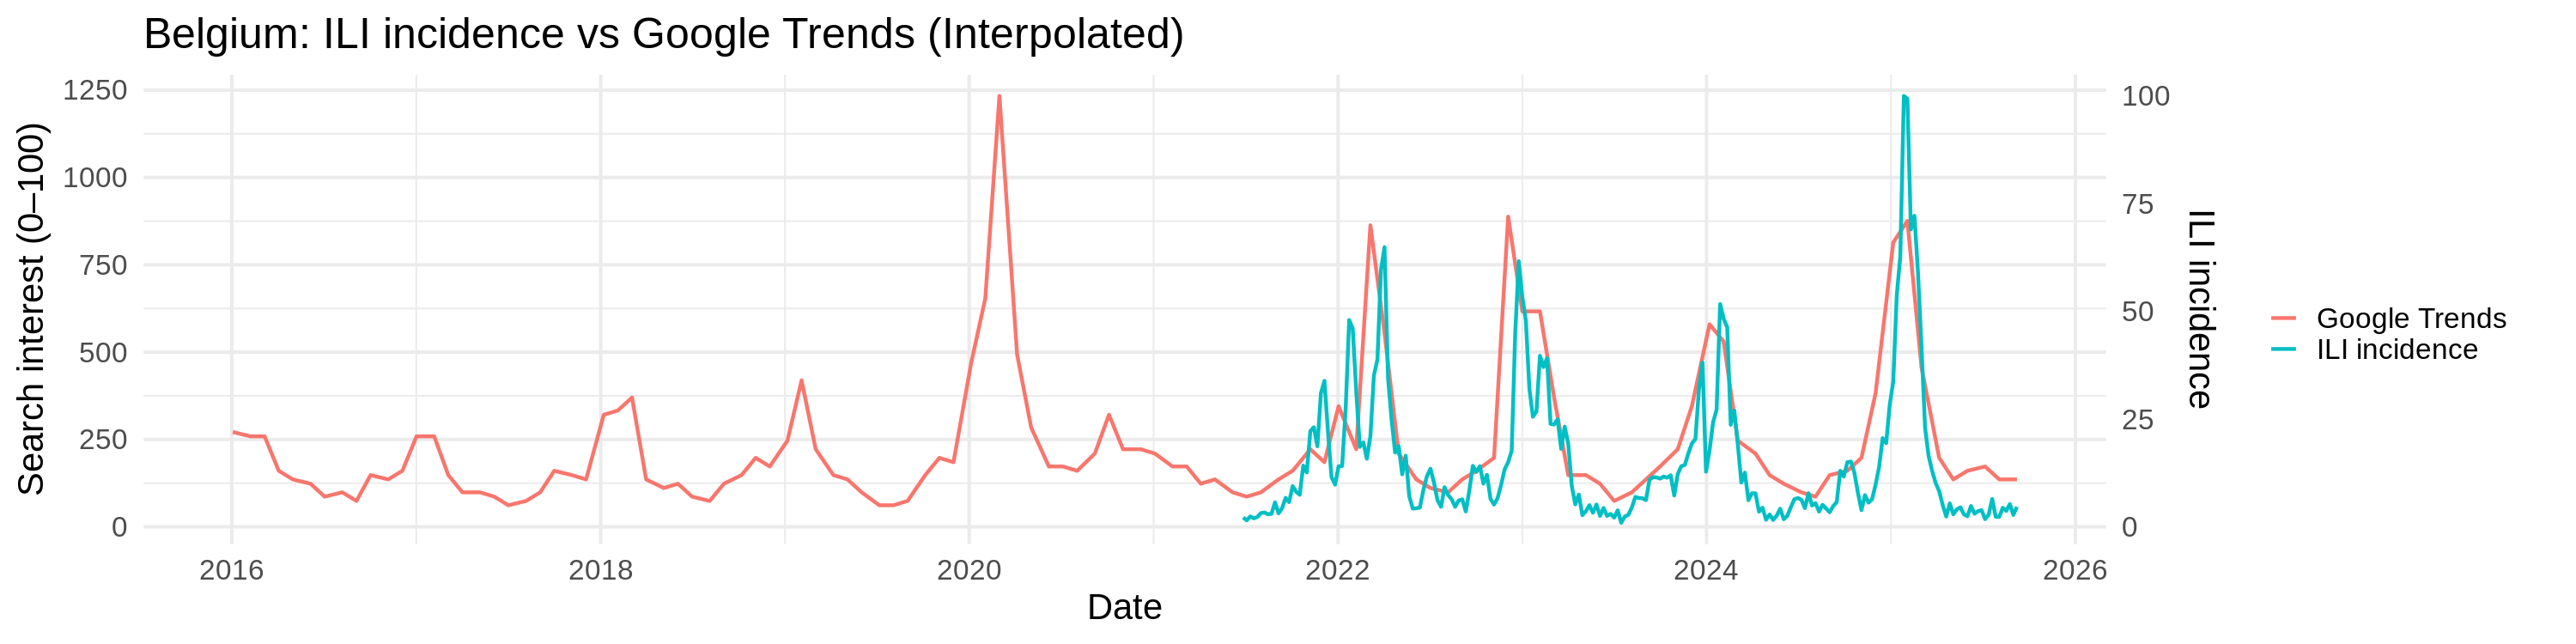

In [205]:
g <- google_be2 %>% mutate(date = as.Date(date)) %>% select(date, hits)
i <- ili_be %>% select(date = date, ili = value)

scale <- max(i$ili, na.rm = TRUE) / max(g$hits, na.rm = TRUE)

ggplot() +
  geom_line(data = g, aes(date, hits* scale, color = "Google Trends"), size = 1) +
  geom_line(data = i, aes(date, ili, color = "ILI incidence"), size = 1) +
  scale_y_continuous(
    name = "Search interest (0–100)",
    sec.axis = sec_axis(~ . / scale, name = "ILI incidence")
  ) +
  labs(title = "Belgium: ILI incidence vs Google Trends (Interpolated)", x = "Date", color = "") +
  theme_minimal(base_size=20)


## Fitting Dataset
based on https://www.sciencedirect.com/science/article/pii/S1755436525000040?via%3Dihub#sec2

In [206]:
# Normalization of Google Trend (do i need to since it is already normalize?)
google_be_norm <- google_be2 %>% mutate(gt_norm = orderNorm(hits)$x.t) #just so it is similar to the paper

Warning message:
“There was 1 warning in `mutate()`.
ℹ In argument: `gt_norm = orderNorm(hits)$x.t`.
Caused by warning in `orderNorm()`:
! Ties in data, Normal distribution not guaranteed”


In [207]:
# ILI transform
ili_be_trans <- ili_be %>% mutate(ili_log = log(value + 1))

In [208]:
train_data <- inner_join(google_be_norm, ili_be_trans, by = "date") %>% select(c('date','hits', 'ili_log', 'value'))
head(train_data,5)

date,hits,ili_log,value
<date>,<dbl>,<dbl>,<dbl>
2021-06-27,7.25,3.321432,26.7
2021-07-04,7.00,2.965273,18.4
2021-07-11,7.25,3.421000,29.6
2021-07-18,7.50,3.226844,24.2
2021-07-25,7.75,3.374169,28.2


`geom_smooth()` using formula = 'y ~ x'


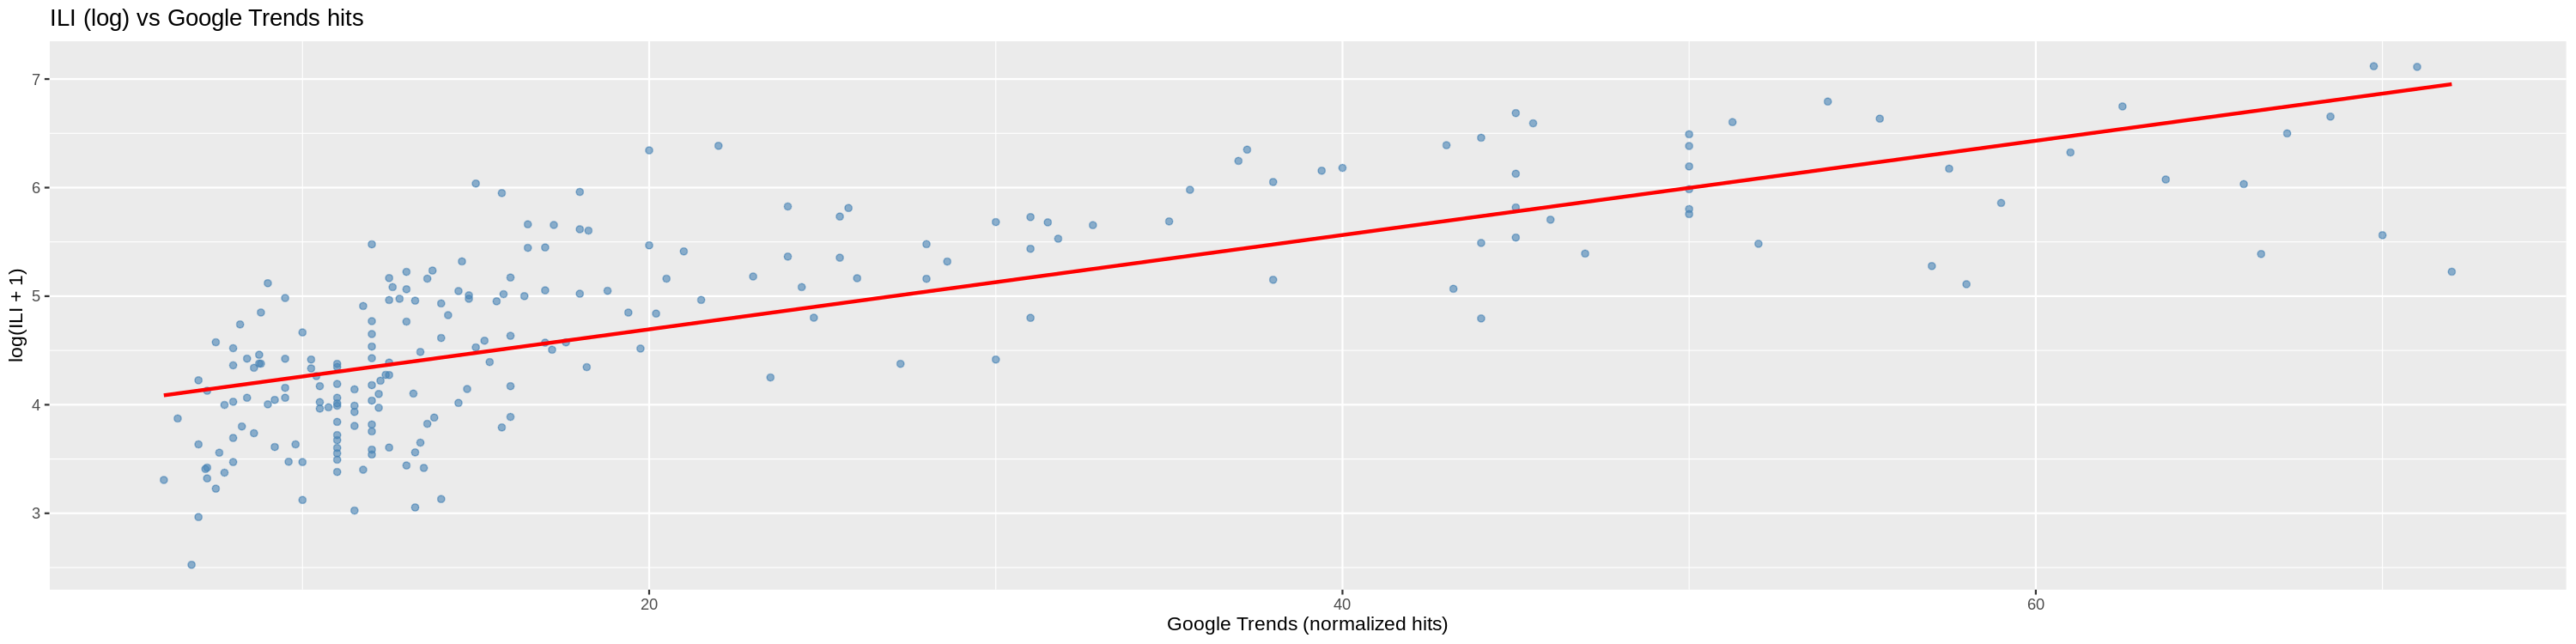

In [209]:
ggplot(train_data, aes(x = hits, y = ili_log)) +
  geom_point(alpha = 0.6, color = "steelblue") +
  geom_smooth(method = "lm", se = FALSE, color = "red") +
  labs(title = "ILI (log) vs Google Trends hits",
       x = "Google Trends (normalized hits)",
       y = "log(ILI + 1)")

In [210]:
best_lag <- function(x, y, lag.max = 10) {
  cc <- ccf(x, y, lag.max = lag.max, plot = TRUE, na.action = na.omit)
  idx <- which.max(abs(cc$acf))
  return(list(lag  = cc$lag[idx], corr = cc$acf[idx]))
}

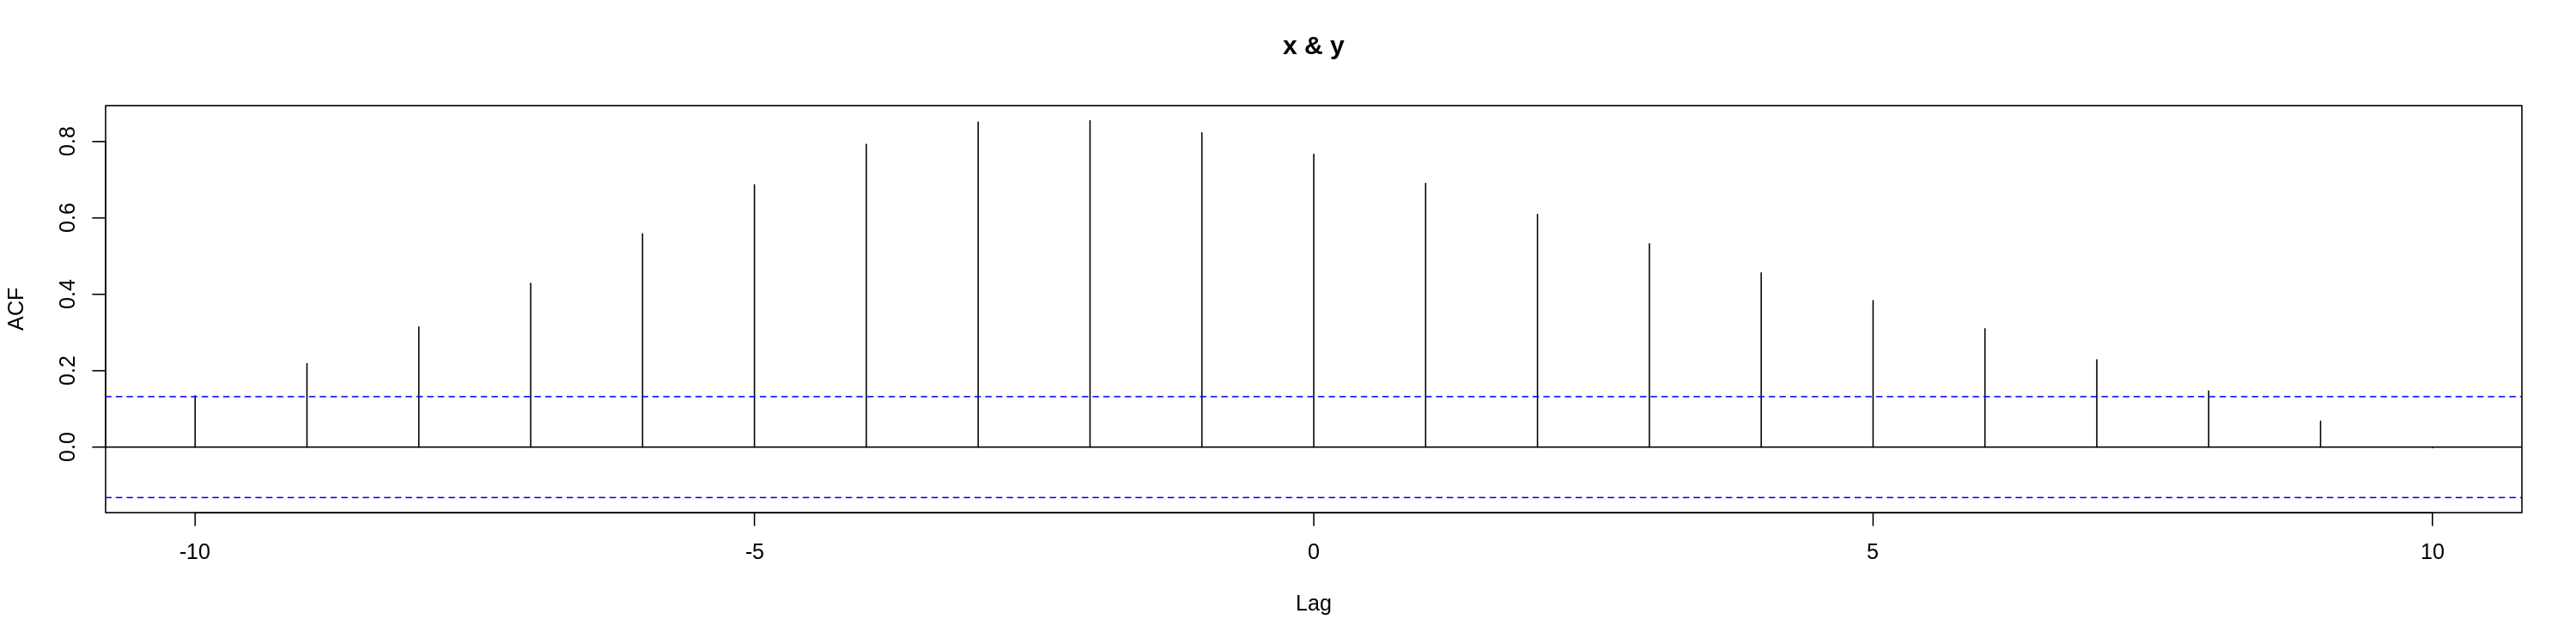

In [211]:
res <- best_lag(train_data$hits, train_data$value, lag.max = 10)
best_klag <- res$lag
best_corr <- res$corr

In [212]:
# Adjust to best lag
train_data2 <- train_data %>%
  mutate(hits_lag = lag(hits, n = -best_klag)) %>%
  filter(!is.na(hits_lag))

## Make model

In [213]:
model <- lm(ili_log ~ hits_lag, data = train_data2)
summary(model)


Call:
lm(formula = ili_log ~ hits_lag, data = train_data2)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.53006 -0.32322 -0.04801  0.36251  1.49859 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 3.779646   0.063736   59.30   <2e-16 ***
hits_lag    0.046024   0.002303   19.99   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.5692 on 216 degrees of freedom
Multiple R-squared:  0.6491,	Adjusted R-squared:  0.6475 
F-statistic: 399.5 on 1 and 216 DF,  p-value: < 2.2e-16


In [214]:
ili_pred <- function(hits, model) {
  b <- coef(model)
  ili_log_pred <- b[1] + b[2] * hits
  ili_pred <- exp(ili_log_pred) - 1
  return(list(ili_log_pred = ili_log_pred, ili_pred = ili_pred))
}

In [215]:
preds <- data.frame(
  date = train_data2$date,
  ili_pred = ili_pred(train_data2$hits_lag, model)$ili_pred)

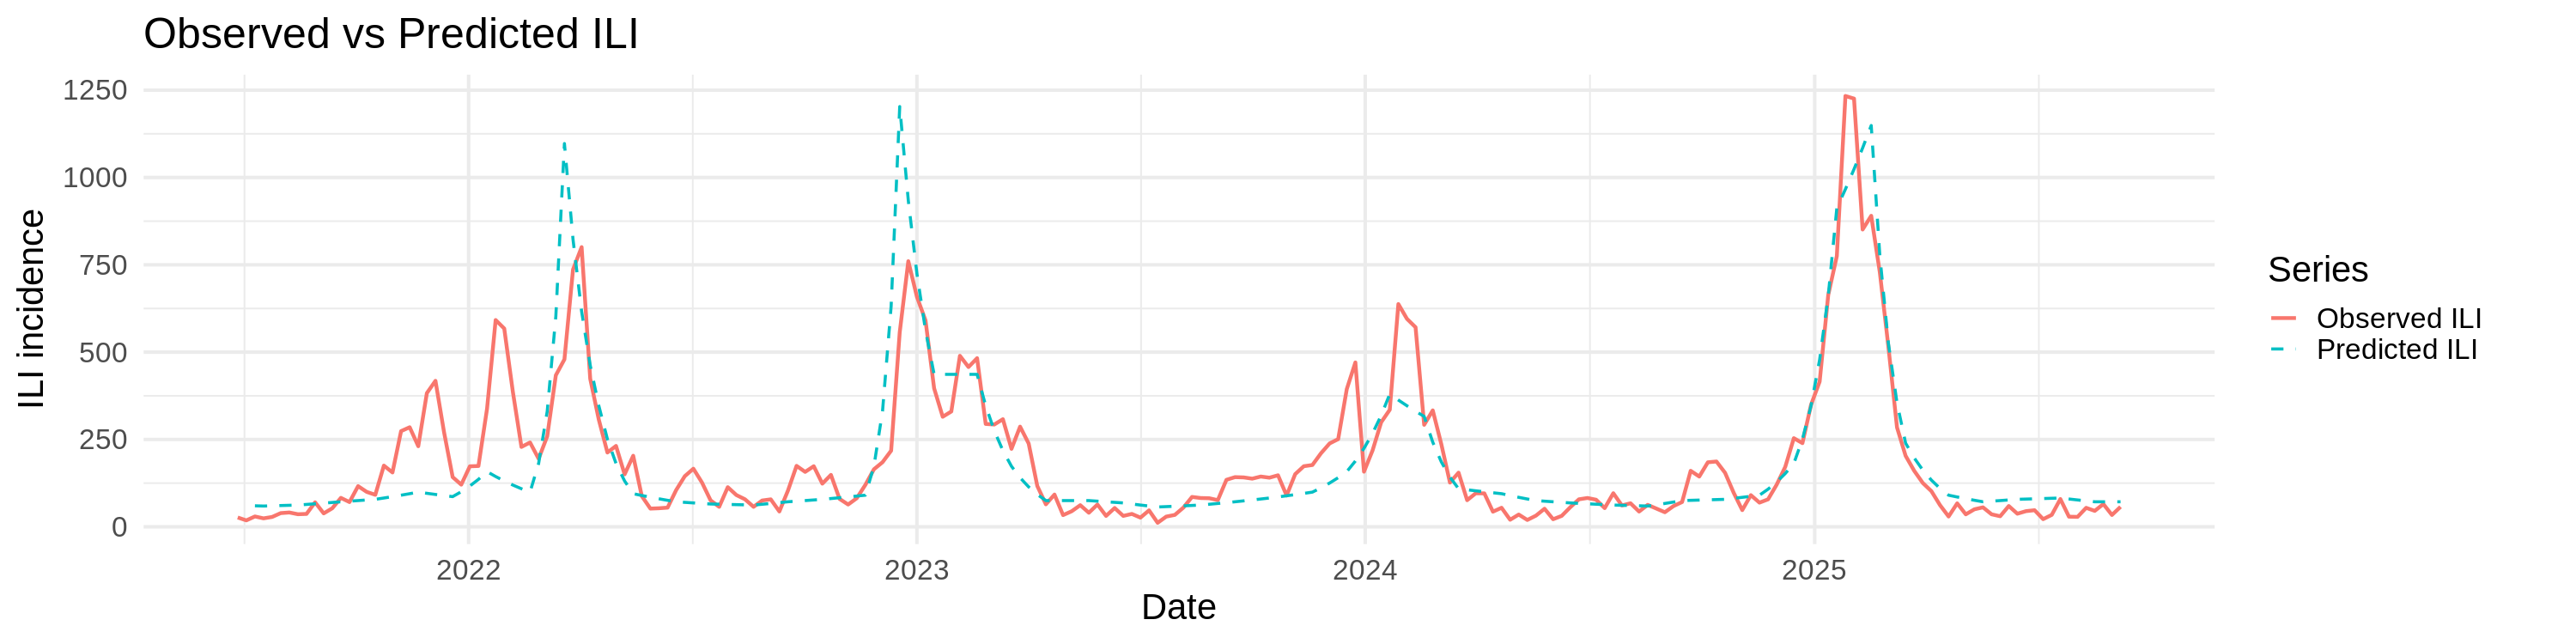

In [216]:
ggplot() +
  geom_line(data = i,
            aes(x = date, y = ili, color = "Observed ILI"), size = 1) +
  geom_line(data = preds,
            aes(x = date, y = ili_pred, color = "Predicted ILI"),
            size = 0.8, linetype = "dashed") +
  labs(title = "Observed vs Predicted ILI",
       x = "Date", y = "ILI incidence", color = "Series") +
  theme_minimal(base_size=20)

## Generate Past ILI Data

In [217]:
cutoff <- min(train_data2$date)

In [218]:
google_before <- google_be2 %>%
                filter(date < cutoff) %>%
                select(date, hits)

In [219]:
past_ili_pred <- data.frame(
  date = google_before$date,
  ili_pred = ili_pred(google_before$hits, model)$ili_pred)

In [220]:
head(past_ili_pred,5)

,date,ili_pred
,<date>,<dbl>
1,2016-01-03,119.5628
2,2016-01-10,118.4581
3,2016-01-17,117.3636
4,2016-01-24,116.2791
5,2016-01-31,115.2045


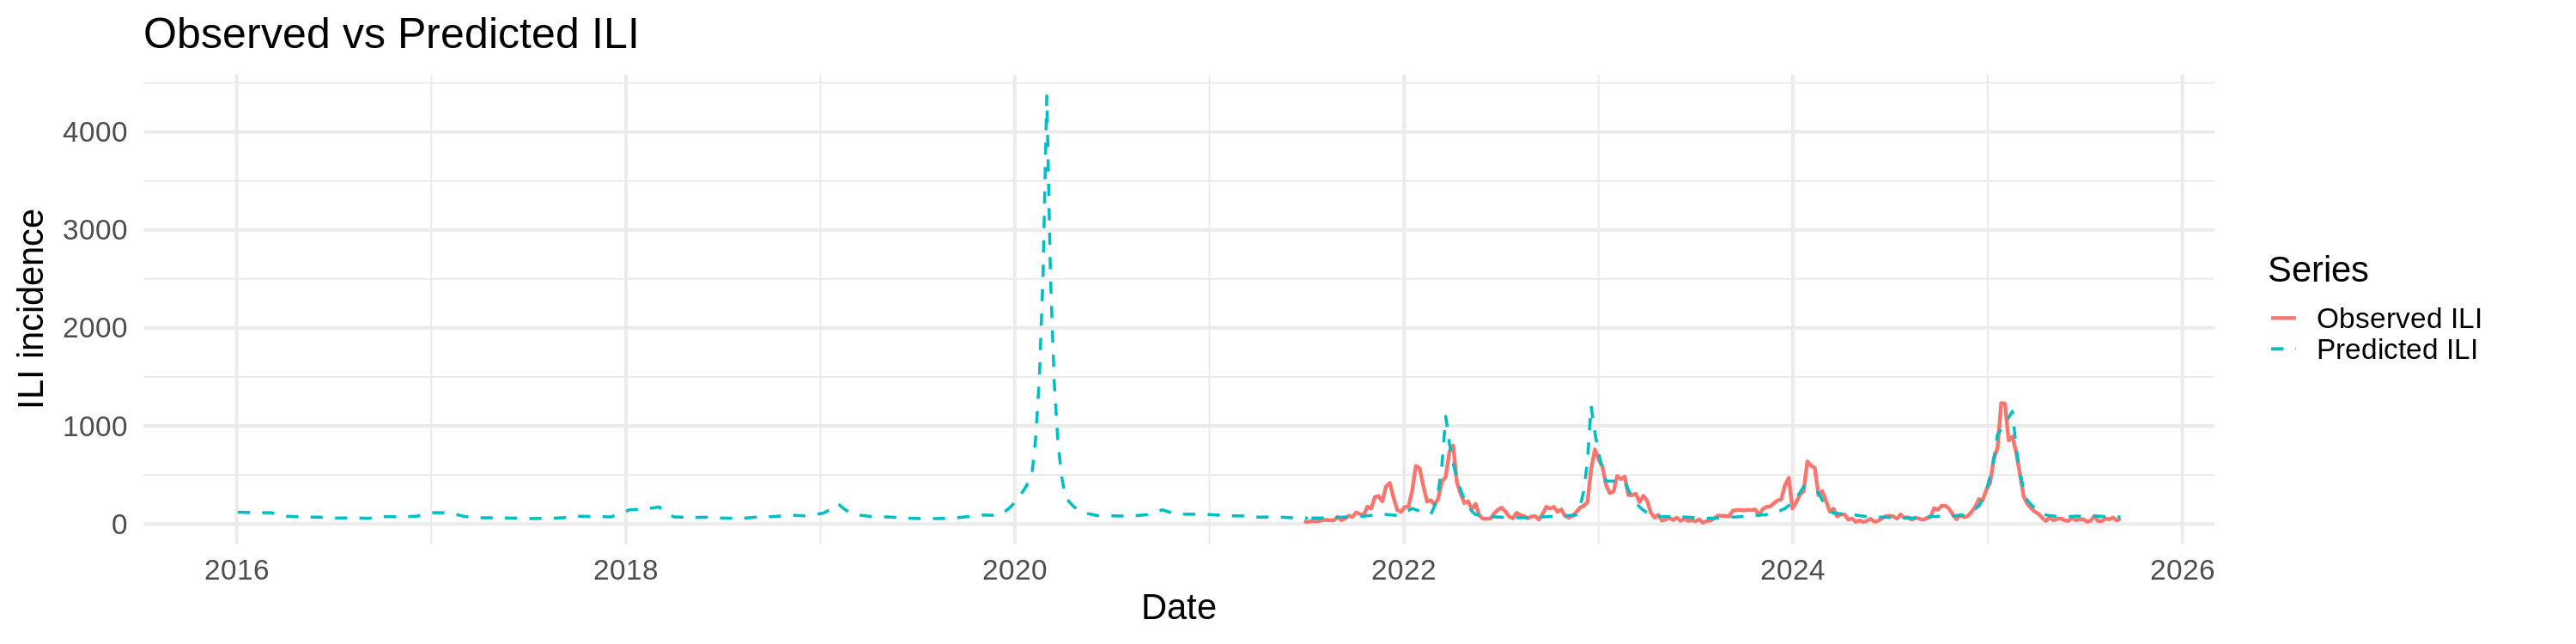

In [221]:
ggplot() +
  geom_line(data = i,
            aes(x = date, y = ili, color = "Observed ILI"), size = 1) +
  geom_line(data = preds,
            aes(x = date, y = ili_pred, color = "Predicted ILI"),
            size = 0.8, linetype = "dashed") +
  geom_line(data = past_ili_pred,
          aes(x = date, y = ili_pred, color = "Predicted ILI"),
          size = 0.8, linetype = "dashed") +
  labs(title = "Observed vs Predicted ILI",
       x = "Date", y = "ILI incidence", color = "Series") +
  theme_minimal(base_size=20)

## Save Data

In [225]:
if (file.exists("/usr/local/lib/python3.6/dist-packages/google/colab/_ipython.py")) {
  install.packages("R.utils")
  library(R.utils)
  library(httr)
  my_check <- function() {return(TRUE)}
  reassignInPackage("is_interactive", pkgName = "httr", my_check)
  options(rlang_interactive=TRUE)
}

In [226]:
packages <- c("googledrive", "googlesheets4")
if (length(setdiff(packages, rownames(installed.packages()))) > 0) {
  install.packages(setdiff(packages, rownames(installed.packages())))
}

In [227]:
library(googledrive)
library(googlesheets4)


Attaching package: ‘googlesheets4’


The following objects are masked from ‘package:googledrive’:

    request_generate, request_make




In [228]:
# Save cache in a file so that i don't have to authenticate repeatedly
drive_auth(cache = "/content/drive/My Drive/.secrets", use_oob = TRUE)

Please point your browser to the following url: 

https://accounts.google.com/o/oauth2/v2/auth?client_id=603366585132-frjlouoa3s2ono25d2l9ukvhlsrlnr7k.apps.googleusercontent.com&scope=https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fuserinfo.email&redirect_uri=https%3A%2F%2Fwww.tidyverse.org%2Fgoogle-callback%2F&response_type=code&state=d032bed5c2c4422299c6ccf6fa06da5c&access_type=offline&prompt=consent



Enter authorization code: eyJjb2RlIjoiNC8wQVZHelIxQWNGN1cwcFdoU3pQREstUXRKRFFhTjBJeERhQTZrbGhfZDFVeWN4c0FsdXRNOGVUMndtTGFNdHV0QVYwT0MzdyIsInN0YXRlIjoiZDAzMmJlZDVjMmM0NDIyMjk5YzZjY2Y2ZmEwNmRhNWMifQ==


In [229]:
write.csv(past_ili_pred, "BE_ili_augment.csv", row.names = FALSE)

In [230]:
folder <- drive_get("Flu Forecast")

drive_upload(
  media = "BE_ili_augment.csv",
  path = as_id(folder$id),
  name = "BE_ili_augment.csv",
  overwrite = TRUE
)

✔ The input `path` resolved to exactly 1 file.

Local file:

• BE_ili_augment.csv

Uploaded into Drive file:

• BE_ili_augment.csv <id: 1Zx5av-d-uaNzCQqaATFhJITCoaQ9iSBu>

With MIME type:

• text/csv

